<a href="https://colab.research.google.com/github/JonathanCornish/machine-learning-challenge/blob/master/ML_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [205]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [206]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
# Read the CSV and Perform Basic Data Cleaning

In [216]:
# Upload the raw csv data file
df = pd.read_csv("exoplanet_data.csv")
# print the columns to see what we're working with
print(df.columns)
# from google.colab import files
# uploaded = files.upload()

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [0]:
df2 = pd.read_csv("exoplanet_data.csv")

In [215]:
print(df2.columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [106]:
# Upload the data file & get the names of all the columns
import io
df = pd.read_csv(io.BytesIO(uploaded['exoplanet_data.csv']))
print(df.columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [217]:
# Show how many column headers there are
print(len(df.columns))

41


In [218]:
# count the number of invalid rows within each column
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [219]:
# Drop the null columns where all values are null (this step is unnecessary, as you can above...)
df = df.dropna(axis='columns', how='all')
# Drop the null rows (this step is unnecessary, as you can above...)
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [220]:
print(len(df.columns))

41


In [0]:
# Select Features (columns)

In [222]:
# Set features. This will also be used as our x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 
                        'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 
                        'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'ra', 'dec', 'koi_steff', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 
                        'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
                        'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag']]
selected_features

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,ra,dec,koi_steff,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,874.8,35.5,-35.5,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,291.93423,48.141651,5455,443,9.11,2.87,-1.62,2.83,0.32,-0.19,25.8,2,5455,81,-81,0.927,0.105,-0.061,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,10829.0,171.0,-171.0,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,297.00482,48.134129,5853,638,39.30,31.04,-10.49,14.60,3.92,-1.31,76.3,1,5853,158,-176,0.868,0.233,-0.078,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,8079.2,12.8,-12.8,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,285.53461,48.285210,5805,1395,891.96,668.95,-230.35,33.46,8.50,-2.83,505.6,1,5805,157,-174,0.791,0.201,-0.067,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,603.3,16.9,-16.9,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,288.75488,48.226200,6031,1406,926.16,874.33,-314.24,2.75,0.88,-0.35,40.9,1,6031,169,-211,1.046,0.334,-0.133,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,686.0,18.7,-18.7,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,296.28613,48.224670,6046,1160,427.65,420.33,-136.70,2.77,0.90,-0.30,40.2,2,6046,189,-232,0.972,0.315,-0.105,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,87.7,13.0,-13.0,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,298.74921,46.973351,5638,929,176.40,152.77,-77.60,1.11,0.32,-0.23,8.4,1,5638,169,-152,1.088,0.313,-0.228,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1579.2,4.6,-4.6,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,297.18875,47.093819,5638,2088,4500.53,3406.38,-1175.26,29.35,7.70,-2.57,453.3,1,5638,139,-166,0.903,0.237,-0.079,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,48.5,5.4,-5.4,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,286.50937,47.163219,6119,1608,1585.81,1537.86,-502.22,0.72,0.24,-0.08,10.6,1,6119,165,-220,1.031,0.341,-0.114,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,103.6,14.7,-14.7,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,294.16489,47.176281,6173,2218,5713.41,5675.74,-1836.94,1.07,0.36,-0.11,12.3,1,6173,193,-236,1.041,0.341,-0.114,15.385


In [0]:
# Create a Train Test Split

# Use `koi_disposition` for the y values

In [0]:
train_dataset = selected_features.sample(frac=0.8,random_state=0)
test_dataset = selected_features.drop(train_dataset.index)

In [225]:
# Showing some stats of the dataframe so you can get a sense of the data we're working with
train_stats = train_dataset.describe()
# train_stats.pop("koi_disposition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
koi_fpflag_nt,5593.0,0.153048,0.360066,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ss,5593.0,0.247095,0.431361,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_co,5593.0,0.203290,0.402482,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,5593.0,0.124084,0.329706,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,5593.0,54.943689,115.399778,2.996978e-01,2.629871,8.830368,33.320091,1.071233e+03
koi_period_err1,5593.0,0.001817,0.007324,1.100000e-08,0.000005,0.000032,0.000237,1.568000e-01
koi_period_err2,5593.0,-0.001817,0.007324,-1.568000e-01,-0.000237,-0.000032,-0.000005,-1.100000e-08
koi_time0bk,5593.0,164.256045,67.361463,1.205159e+02,132.689100,136.625860,169.716290,1.472522e+03
koi_time0bk_err1,5593.0,0.009177,0.022122,1.330000e-05,0.001180,0.003990,0.009800,5.690000e-01
koi_time0bk_err2,5593.0,-0.009177,0.022122,-5.690000e-01,-0.009800,-0.003990,-0.001180,-1.330000e-05


In [0]:
# Separate the target value, or "label", from the features. This label is the value that we will train the model to predict
train_labels = train_dataset.pop('koi_disposition')
test_labels = test_dataset.pop('koi_disposition')

In [227]:
# show the test labels
test_labels

0            CONFIRMED
7            CONFIRMED
21           CONFIRMED
24      FALSE POSITIVE
25           CONFIRMED
             ...      
6968    FALSE POSITIVE
6970    FALSE POSITIVE
6971    FALSE POSITIVE
6977    FALSE POSITIVE
6988         CANDIDATE
Name: koi_disposition, Length: 1398, dtype: object

In [228]:
# show the target labels
train_labels

4990    FALSE POSITIVE
1425         CONFIRMED
144          CONFIRMED
6589    FALSE POSITIVE
4443         CANDIDATE
             ...      
4112         CANDIDATE
2020         CANDIDATE
6233         CANDIDATE
367     FALSE POSITIVE
5502    FALSE POSITIVE
Name: koi_disposition, Length: 5593, dtype: object

In [229]:
# show the unique labels for test data
test_labels.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [230]:
# show the unique labels for training data to confirm they are the same as the test data labels
train_labels.unique()

array(['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode training data labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)
encoded_train_labels = label_encoder.transform(train_labels)
# Step 2: Label-encode test data labels
label_encoder = LabelEncoder()
label_encoder.fit(test_labels)
encoded_test_labels = label_encoder.transform(test_labels)

In [0]:
# from keras.utils import to_categorical
# encoded_train_labels = to_categorical(train_labels)

# from keras.utils import to_categorical
# encoded_test_labels = to_categorical(test_labels)

In [233]:
# Showing the result of label-encoding:
for encoded_label, original_label in zip(encoded_train_labels, train_labels):
    print('Original Label: ' + str(original_label))
    print('Encoded Label: ' + str(encoded_label))
    print('-' * 12)

Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Ori

In [0]:
# As you can see, we did not do hot-popping (or whatever that is called...)

In [235]:
print(len(encoded_train_labels[encoded_train_labels == 0]))
print(len(encoded_train_labels[encoded_train_labels == 1]))
print(len(encoded_train_labels[encoded_train_labels == 2]))

1367
1441
2785


In [236]:
print(len(encoded_train_labels))

5593


In [237]:
train_dataset.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,ra,dec,koi_steff,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
4990,1,0,0,0,370.317610,0.011940,-0.011940,230.300100,0.023500,-0.023500,1885.0,151.0,-151.0,0.3565,0.1197,-0.3565,12.5880,0.7280,-0.7280,285.20850,49.207829,4665,182,0.26,0.09,-0.07,2.98,0.26,-0.27,15.1,1,4665,145,-125,0.701,0.061,-0.063,15.988
1425,0,0,0,0,1.646802,0.000004,-0.000004,132.061500,0.001750,-0.001750,284.2,14.0,-14.0,0.1290,0.3460,-0.1290,1.1966,0.0617,-0.0617,290.43402,44.107651,3810,806,99.80,24.80,-21.54,0.86,0.07,-0.06,25.2,1,3810,76,-84,0.513,0.038,-0.038,14.634
144,0,0,0,0,2.382952,0.000003,-0.000003,135.080841,0.000981,-0.000981,391.6,10.4,-10.4,0.4790,0.4160,-0.3110,1.8876,0.0297,-0.0297,292.87338,42.966141,5427,1253,583.01,196.96,-121.98,1.86,0.21,-0.13,41.4,4,5427,108,-108,0.929,0.104,-0.069,15.158
6589,1,0,0,0,677.562820,0.032860,-0.032860,214.239100,0.044500,-0.044500,631.0,119.0,-119.0,0.5370,0.4380,-0.3230,10.5300,2.4000,-2.4000,290.47623,49.202610,5511,190,0.31,0.22,-0.10,2.24,0.51,-0.27,8.5,1,5511,166,-166,0.872,0.196,-0.105,15.721
4443,0,0,0,0,56.001782,0.000604,-0.000604,144.096840,0.008490,-0.008490,125.2,21.3,-21.3,0.5045,0.0243,-0.4541,1.7060,0.3040,-0.3040,289.09619,39.827278,6116,584,27.51,37.53,-13.11,1.54,0.70,-0.36,7.2,1,6116,165,-177,1.332,0.610,-0.310,13.228


In [0]:
# Pre-processing

# Scale the data using the MinMaxScaler and perform some feature selection
# note I decided to normalize using essentially a z-score, rather than using the MinMaxScaler function...

In [0]:
# Normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [240]:
normed_train_data

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,ra,dec,koi_steff,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
4990,2.352209,-0.572826,-0.505090,-0.376346,2.732882,1.382222,-1.382222,0.980443,0.647442,-0.647442,-0.266465,0.002348,-0.002348,-0.114508,-0.198402,-0.022682,1.089034,0.617884,-0.617884,-1.436939,1.487065,-1.291387,-1.091363,-0.069977,-0.095807,0.080141,-0.033981,-0.046463,0.030115,-0.313682,-0.355050,-1.291387,0.021160,0.497473,-0.183560,-0.340871,0.180761,1.268472
1425,-0.425056,-0.572826,-0.505090,-0.376346,-0.461846,-0.247608,0.247608,-0.477937,-0.335732,0.335732,-0.285894,-0.023960,0.023960,-0.185193,-0.175116,0.181866,-0.666680,-0.382767,0.382767,-0.341937,0.082287,-2.359107,-0.345467,-0.068798,-0.095025,0.079533,-0.034528,-0.046950,0.030254,-0.301540,-0.355050,-2.359107,-1.450690,1.058991,-0.218146,-0.368164,0.195229,0.272993
144,-0.425056,-0.572826,-0.505090,-0.376346,-0.455467,-0.247704,0.247704,-0.433114,-0.370493,0.370493,-0.284591,-0.024651,0.024651,-0.076447,-0.167913,0.018228,-0.560179,-0.430825,0.430825,0.169229,-0.232128,-0.339806,0.188853,-0.063080,-0.089575,0.076693,-0.034270,-0.046591,0.030208,-0.282065,4.273844,-0.339806,-0.768093,0.730297,-0.141615,-0.289844,0.177288,0.658245
6589,2.352209,-0.572826,-0.505090,-0.376346,5.395323,4.238676,-4.238676,0.742013,1.596713,-1.596713,-0.281685,-0.003797,0.003797,-0.058426,-0.165650,0.007438,0.771842,3.128900,-3.128900,-0.333092,1.485628,-0.234907,-1.081800,-0.069976,-0.095803,0.080140,-0.034172,-0.045823,0.030115,-0.321616,-0.355050,-0.234907,0.469114,-0.064046,-0.152101,-0.180672,0.156454,1.072170
4443,-0.425056,-0.572826,-0.505090,-0.376346,0.009169,-0.165589,0.165589,-0.299269,-0.031061,0.031061,-0.287824,-0.022558,0.022558,-0.068524,-0.208218,-0.110435,-0.588168,-0.018880,0.018880,-0.622278,-1.096687,0.520614,-0.610833,-0.069654,-0.094622,0.079772,-0.034352,-0.045337,0.030056,-0.323179,-0.355050,0.520614,0.447783,-0.214697,-0.067475,0.310604,0.037815,-0.760718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,-0.425056,-0.572826,-0.505090,-0.376346,-0.436148,-0.243377,0.243377,-0.451218,-0.173000,0.173000,-0.288991,-0.026188,0.026188,-0.221545,-0.165444,0.287061,-0.435738,-0.224627,0.224627,1.065145,0.685301,-0.254888,-0.075318,-0.066805,-0.093071,0.078478,-0.034618,-0.046976,0.030261,-0.315365,-0.355050,-0.254888,-1.493352,1.086382,-0.135728,-0.276791,0.167450,-1.788546
2020,-0.425056,-0.572826,-0.505090,-0.376346,0.695359,-0.204804,0.204804,0.396026,-0.324431,0.324431,-0.281292,-0.024939,0.024939,-0.218127,-0.176351,0.277171,0.508148,-0.376910,0.376910,0.035440,-0.247740,0.039828,-0.896521,-0.069940,-0.095770,0.080120,-0.034151,-0.046335,0.030162,-0.228690,-0.355050,0.039828,-0.874749,0.634428,-0.145846,-0.272044,0.170922,-1.101122
6233,-0.425056,-0.572826,-0.505090,-0.376346,-0.406775,-0.233819,0.233819,-0.428090,0.118562,-0.118562,-0.288097,-0.024210,0.024210,-0.087943,-0.209483,-0.099556,-0.323225,-0.066938,0.066938,-0.241139,-0.776844,0.163459,-0.276136,-0.068420,-0.092371,0.079126,-0.034517,-0.046463,0.030241,-0.320053,-0.355050,0.163459,0.277133,-0.187306,-0.151365,-0.121339,0.169765,0.565608
367,-0.425056,1.745419,1.979491,2.656655,-0.430605,-0.247399,0.247399,2.866117,-0.383964,0.383964,-0.160397,-0.009846,0.009846,0.164969,-0.194872,0.203444,-0.094425,-0.420913,0.420913,0.614302,0.141158,-0.196194,-0.170946,-0.067682,-0.090867,0.078515,-0.025177,-0.022499,0.027756,-0.155960,-0.355050,-0.196194,0.810412,-0.283175,-0.152101,-0.145072,0.165135,1.097902


In [0]:
# Build & Define the Model
def build_model():
  model = keras.Sequential([
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(3)
  ])

  optimizer = tf.keras.optimizers.Adam(0.0001)
  # optimizer = tf.train.AdamOptimizer()
  # loss = tf.keras.losses.CategoricalCrossentropy()
  loss = 'sparse_categorical_crossentropy'

# may have to use 'SparseCategoricalCrossentropy' to do this, bc sparse_categorical_crossentropy expects
# the format of the labels to be One Hot Encoding...
# Compile the Model
  model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model = build_model()

In [243]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               4992      
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
flatten_16 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 99        
Total params: 25,731
Trainable params: 25,731
Non-trainable params: 0
_________________________________________________________________


In [244]:
# checking to see if the model is working (it appears to be...)
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.00379367,  0.03228664,  0.03878058],
       [ 0.00297859,  0.00622889,  0.04210592],
       [-0.00926399,  0.02263226,  0.02802122],
       [ 0.00094576,  0.03602143,  0.05321974],
       [-0.0140602 ,  0.02430892,  0.03613675],
       [-0.01795193,  0.0072409 ,  0.04341637],
       [-0.0085448 , -0.00503328,  0.04461162],
       [-0.00979465,  0.01045514,  0.0286242 ],
       [-0.00244923,  0.02909822,  0.03699471],
       [ 0.01070173,  0.02002866,  0.06270109]], dtype=float32)

Train the model

In [245]:
# EPOCHS = 1000
EPOCHS = 60

history = model.fit(
  normed_train_data, encoded_train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[tfdocs.modeling.EpochDots()])

Train on 4474 samples, validate on 1119 samples
Epoch 1/60
4288/4474 [===========================>..] - ETA: 0s - loss: 2.2337 - accuracy: 0.5898
Epoch: 0, accuracy:0.5943,  loss:2.1775,  val_accuracy:0.6944,  val_loss:0.7933,  
4474/4474 [==============================] - 1s 175us/sample - loss: 2.1775 - accuracy: 0.5943 - val_loss: 0.7933 - val_accuracy: 0.6944
Epoch 2/60
4474/4474 [==============================] - 0s 79us/sample - loss: 0.7110 - accuracy: 0.7260 - val_loss: 0.6086 - val_accuracy: 0.7578
Epoch 3/60
4474/4474 [==============================] - 0s 87us/sample - loss: 0.5726 - accuracy: 0.7785 - val_loss: 0.5435 - val_accuracy: 0.7900
Epoch 4/60
4474/4474 [==============================] - 0s 84us/sample - loss: 0.5030 - accuracy: 0.8160 - val_loss: 0.4793 - val_accuracy: 0.8284
Epoch 5/60
4474/4474 [==============================] - 0s 90us/sample - loss: 0.4686 - accuracy: 0.8397 - val_loss: 0.5711 - val_accuracy: 0.8320
Epoch 6/60
4474/4474 [========================

In [246]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
55,0.706355,0.800402,0.663867,0.805183,55
56,0.713297,0.809119,0.691079,0.808758,56
57,0.718352,0.813590,0.706552,0.811439,57
58,0.721741,0.815154,0.708442,0.810545,58
59,0.729248,0.816048,0.727923,0.813226,59


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Loss [Planet Classifications]')

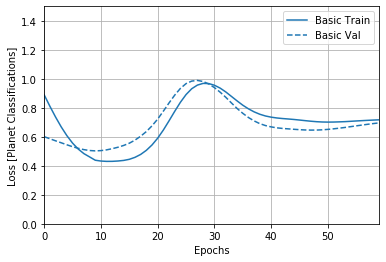

In [248]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1.5])
plt.ylabel('Loss [Planet Classifications]')

Text(0, 0.5, 'Accuracy [Planet Classifications]')

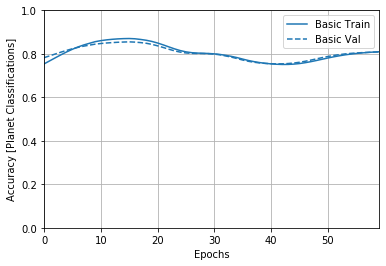

In [249]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('Accuracy [Planet Classifications]')

In [0]:
# As we can see, this is classic overfitting/it isn't working.!!!
# So, let's update the model to stop early once the val_loss is clearly degrading...

In [251]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

early_history = model.fit(normed_train_data, encoded_train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.4408,  loss:2.3729,  val_accuracy:0.4486,  val_loss:1.1155,  
........................

Text(0, 0.5, 'Loss [Planet Classifications]')

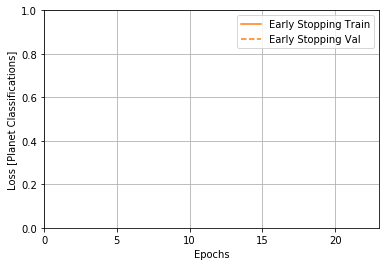

In [252]:
plotter.plot({'Early Stopping': early_history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('Loss [Planet Classifications]')

In [0]:
# not sure why the above isn't showing up...

In [254]:
plotter.plot({'Early Stopping': early_history}, metric = "acc")
plt.ylim([0, 1])
plt.ylabel('Accuracy [Planet Classifications]')

KeyError: ignored

In [0]:
# Hyperparameter Tuning

# Use `GridSearchCV` to tune the model's parameters

In [0]:
# Create the GridSearchCV model

In [0]:
# Train the model with GridSearch

In [0]:
# print(grid2.best_params_)
# print(grid2.best_score_)

In [0]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)